# AutoEncoder with MNIST 

### Load DataSet

In [1]:
def getDataSet():
    return tflearn.datasets.mnist.load_data(one_hot=True)

### Train

In [2]:
def trainModel(x):
    input_layer = tflearn.input_data([None, 784])
    enco_layer = tflearn.fully_connected(input_layer, 256)
    enco_layer = tflearn.fully_connected(enco_layer, 64)
    enco_layer = tflearn.fully_connected(enco_layer, 32)
    deco_layer = tflearn.fully_connected(enco_layer, 64)
    deco_layer = tflearn.fully_connected(deco_layer, 256)


    dense = tflearn.fully_connected(deco_layer, 784, activation='sigmoid')
    net = tflearn.regression(dense, loss='mean_square')

    model = tflearn.DNN(net)
    model.fit(x, x, n_epoch=2, batch_size=256, show_metric=True)
    return model

### Evaluate 

In [3]:
def evaluateModel(model, test_x):
    score = model.evaluate(test_x, test_x)
    return score

### Predict

In [4]:
def predictAndDisplay(model, test_x):
    pred = model.predict(test_x)
    fig, axes = plt.subplots(2, 2)

    axes[0, 0].imshow(test_x[0].reshape((28, 28)), cmap='gray')
    axes[0, 1].imshow(test_x[1].reshape((28, 28)), cmap='gray')
    axes[1, 0].imshow(pred[0].reshape((28, 28)), cmap='gray')
    axes[1, 1].imshow(pred[1].reshape((28, 28)), cmap='gray')
    fig.show()
    plt.show()

Training Step: 429  | total loss: 0.06481 | time: 2.909s
| Adam | epoch: 002 | loss: 0.06481 - acc: 0.0141 -- iter: 54784/55000
Training Step: 430  | total loss: 0.06490 | time: 2.924s
| Adam | epoch: 002 | loss: 0.06490 - acc: 0.0147 -- iter: 55000/55000
--
Score:- [0.013]


/home/dharanee/.local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


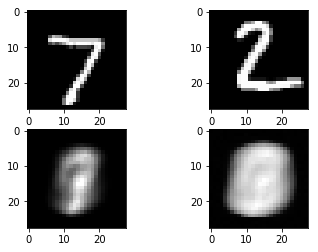

In [5]:
import tflearn
import matplotlib.pyplot as plt


x, y, test_x, test_y = getDataSet()
model = trainModel(x)
score = evaluateModel(model, test_x)
print("Score:-", score)
predictAndDisplay(model, test_x)